In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [29]:
df = pd.read_csv('Vehicles.csv') 
df.head()

,CRASH_UNIT_ID,RD_NO,CRASH_DATE,UNIT_NO,UNIT_TYPE,VEHICLE_ID,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,OCCUPANT_CNT,FIRST_CONTACT_POINT
0,561555,JC113649,01/12/2019 12:01:00 AM,1,DRIVER,535742.0,UNKNOWN,UNKNOWN,XX,NaN,UNKNOWN,UNKNOWN/NA,UNKNOWN/NA,S,STRAIGHT AHEAD,1.0,REAR-RIGHT
1,561563,JC113627,01/11/2019 11:36:00 PM,2,DRIVER,535738.0,"TOYOTA MOTOR COMPANY, LTD.",Highlander(beginning vehicle year 2001),IL,2003.0,NONE,SPORT UTILITY VEHICLE (SUV),PERSONAL,S,STRAIGHT AHEAD,1.0,FRONT-RIGHT
2,561564,JC113627,01/11/2019 11:36:00 PM,1,DRIVER,535741.0,FORD,EXPLORER,IL,2001.0,NONE,SPORT UTILITY VEHICLE (SUV),PERSONAL,E,STRAIGHT AHEAD,1.0,FRONT-LEFT
3,561540,JC113637,01/11/2019 11:31:00 PM,1,DRIVER,535714.0,CHEVROLET,MALIBU (CHEVELLE),IL,2013.0,NONE,PASSENGER,PERSONAL,N,STRAIGHT AHEAD,1.0,SIDE-LEFT
4,561541,JC113637,01/11/2019 11:31:00 PM,2,DRIVER,535718.0,JEEP,LAREDO,IL,2016.0,NONE,PASSENGER,PERSONAL,S,STRAIGHT AHEAD,1.0,SIDE-LEFT


1) CRASH_UNIT_ID: identificativo dell'unità di incidente
2) RD_NO: numero di report
3) CRASH_DATE: data e ora dell'incidente
4) UNIT_NO: Numero di persone coinvolte
5) UNIT_TYPE: identificano il tipo di unità coinvolta (es., DRIVER)
6) VEHICLE_ID: autoesplicativo
7) MAKE: casa di fabbrica
8) MODEL: modello del veicolo
9) LIC_PLATE_STATE: Stato di provenienza
10) VEHICLE_YEAR: anno del veicolo
11) VEHICLE_DEFECT: difetto del veicolo
12) VEHICLE_TYPE: tipologia di veicolo
13) VEHICLE_USE: tipologia di uso del veicolo
14) TRAVEL_DIRECTION: Direzione del veicolo, nord, sud, est, ovest
15) MANEUVER: manovre
16) OCCUPANT_CNT: numero di occupanti
17) FIRST_CONTACT_POINTOCCUPANT_CNT: primo punto di contatto

In [30]:
# Elimina le righe con valori NaN in 'UNIT_TYPE'
df_noNaN = df.dropna(subset=['UNIT_TYPE'])
df_noNaN = df_noNaN.dropna(subset=['VEHICLE_ID'])
df_noNaN = df_noNaN.dropna(subset=['MODEL'])
df_noNaN = df_noNaN.dropna(subset=['LIC_PLATE_STATE'])
df_noNaN = df_noNaN.dropna(subset=['VEHICLE_YEAR'])
df_noNaN = df_noNaN.dropna(subset=['FIRST_CONTACT_POINT'])
# Per vedere il numero di valori nulli in ciascuna colonna
print(df_noNaN.isnull().sum())

CRASH_UNIT_ID          0
RD_NO                  0
CRASH_DATE             0
UNIT_NO                0
UNIT_TYPE              0
VEHICLE_ID             0
MAKE                   0
MODEL                  0
LIC_PLATE_STATE        0
VEHICLE_YEAR           0
VEHICLE_DEFECT         0
VEHICLE_TYPE           0
VEHICLE_USE            0
TRAVEL_DIRECTION       0
MANEUVER               0
OCCUPANT_CNT           0
FIRST_CONTACT_POINT    0
dtype: int64


Ho eliminato 103203 righe

In [31]:
# Numero di righe e colonne
print('Il dataset ha', df_noNaN.shape[0], 'righe e', df_noNaN.shape[1], 'colonne.')


Il dataset ha 357234 righe e 17 colonne.


In [32]:
# Statistiche descrittive per colonne numeriche
print(df_noNaN.describe())

       CRASH_UNIT_ID        UNIT_NO     VEHICLE_ID   VEHICLE_YEAR  \
count  357234.000000  357234.000000  357234.000000  357234.000000   
mean   276828.549595       1.515886  267320.614222    2013.865816   
std    162004.354396       0.554050  154190.817311     185.952217   
min         2.000000       1.000000       2.000000    1900.000000   
25%    136450.250000       1.000000  136218.250000    2005.000000   
50%    274486.500000       1.000000  266644.500000    2011.000000   
75%    416253.750000       2.000000  399975.750000    2014.000000   
max    561564.000000       9.000000  535741.000000    9999.000000   

        OCCUPANT_CNT  
count  357234.000000  
mean        1.281566  
std         0.776491  
min         0.000000  
25%         1.000000  
50%         1.000000  
75%         1.000000  
max        60.000000  


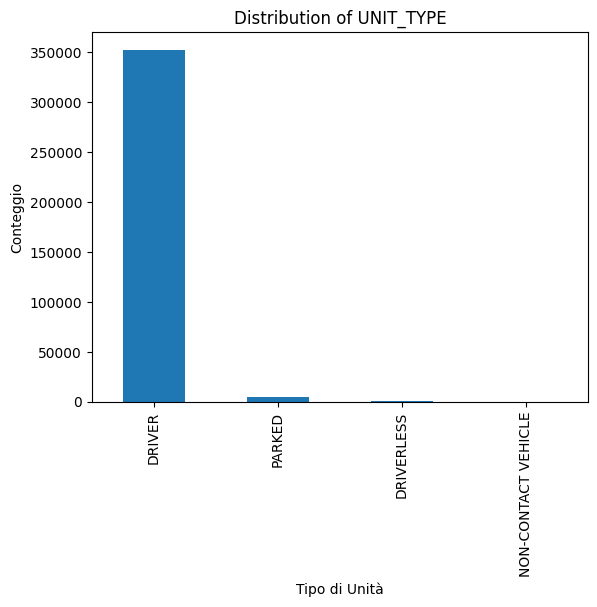

In [34]:
import matplotlib.pyplot as plt

# Grafico a barre per 'UNIT_TYPE'
df_noNaN['UNIT_TYPE'].value_counts().plot(kind='bar')
plt.xlabel('Tipo di Unità')
plt.ylabel('Conteggio')
plt.title('Distribution of UNIT_TYPE')
plt.show()


Come potevamo già immaginare nella maggior parte degli incidenti sono coinvolti i guidatori stessi. In seguito abbiamo un basso numero di incidenti mentre si è parcheggiati, quelli senza guidatore  e in fine i veicoli che non hanno subito contatto

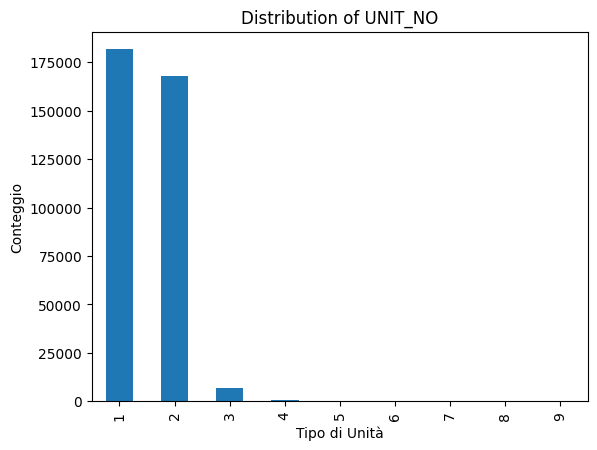

In [35]:
# Grafico a barre per 'UNIT_TYPE'
df_noNaN['UNIT_NO'].value_counts().plot(kind='bar')
plt.xlabel('Tipo di Unità')
plt.ylabel('Conteggio')
plt.title('Distribution of UNIT_NO')
plt.show()

La maggior parte degli incidenti è ha coinvolto un solo veicolo, ma abbiamo anche molti casi in cui i veicoli sono stati 2 finoa  scendere drasticamente ma mano che il numero di unità aumenta

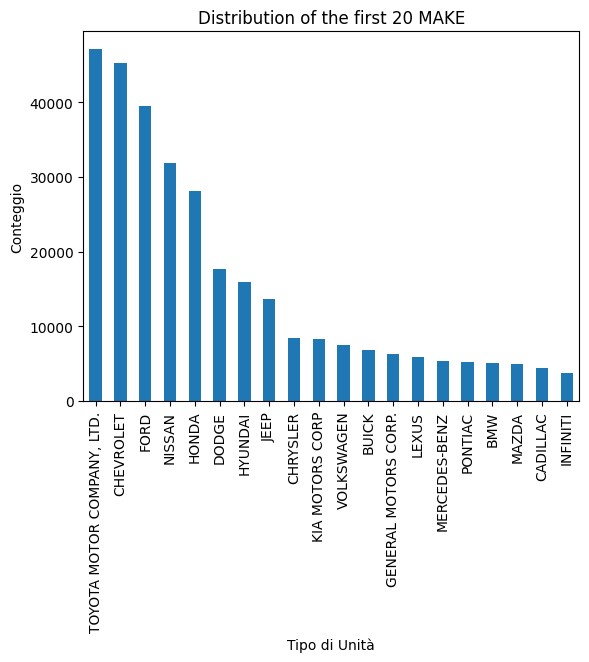

In [36]:
df_noNaN['MAKE'].value_counts().head(20).plot(kind='bar')
plt.xlabel('Tipo di Unità')
plt.ylabel('Conteggio')
plt.title('Distribution of the first 20 MAKE')
plt.show()



Nella distribuzione dei marchi, possiamo notare come toyota, chevrolet e ford si distinguono particolarmente, gli altri man mano scemano.
Ho deciso di prendere i top 20 marchi perchè altrimenti il grafico sarebbe stato illeggibile

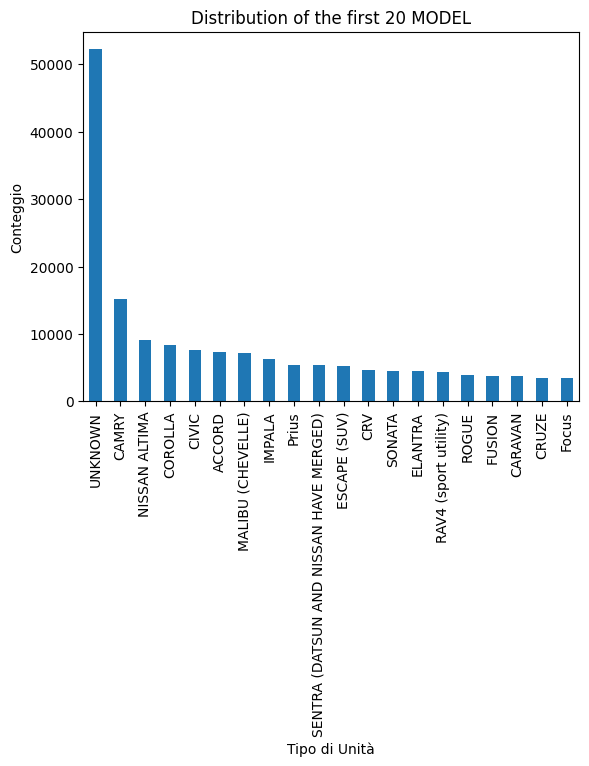

In [37]:
df_noNaN['MODEL'].value_counts().head(20).plot(kind='bar')
plt.xlabel('Tipo di Unità')
plt.ylabel('Conteggio')
plt.title('Distribution of the first 20 MODEL')
plt.show()


Come possiamo vedere la maggior parte degli incidenti sono stati fatti da macchine di cui non si il modello. 
Ho deciso di mantenere UNKNOWN come valore anche se nan perchè reputo che possa aiutare ad avere un quadro generale più completo ed inoltre non influisce negativamente sull'analisi

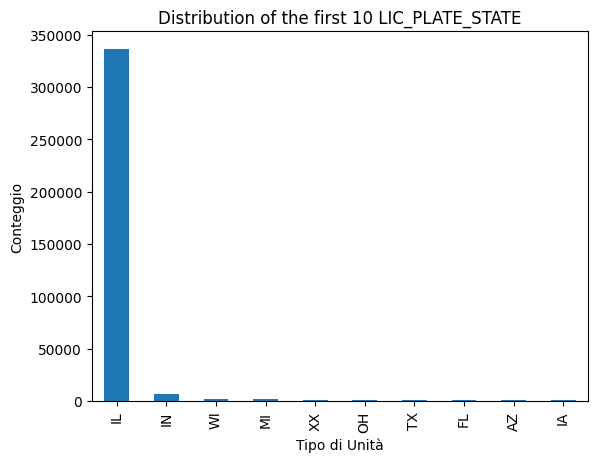

In [38]:
df_noNaN['LIC_PLATE_STATE'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Tipo di Unità')
plt.ylabel('Conteggio')
plt.title('Distribution of the first 10 LIC_PLATE_STATE')
plt.show()


Da qui possiamo vedere come la maggior parte degli incidenti sono fatti da auto con targhe israliane

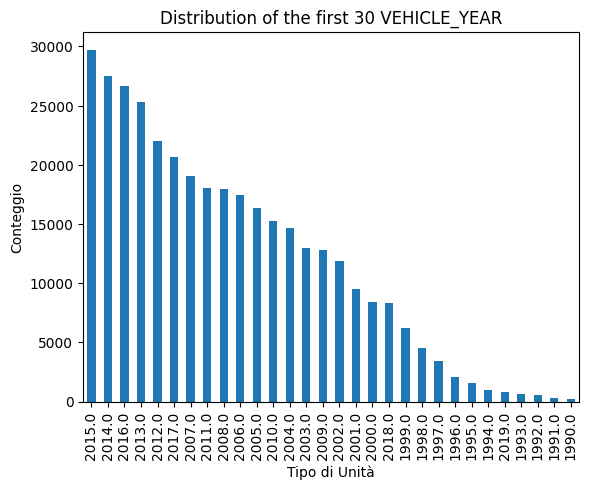

In [39]:
df_noNaN['VEHICLE_YEAR'].value_counts().head(30).plot(kind='bar')
plt.xlabel('Tipo di Unità')
plt.ylabel('Conteggio')
plt.title('Distribution of the first 30 VEHICLE_YEAR')
plt.show()




La maggior parte degli incidenti sono state fatti da auto del 2015, questo ci può suggerire che le auto di quell'annata non abbiamo ricevuto dei controlli specifici atti a definire la sicurezza dell'auto.
Ovviamente sono solo supposizioni, un po di story telling (anche se non serve, giusto per avere una idea)

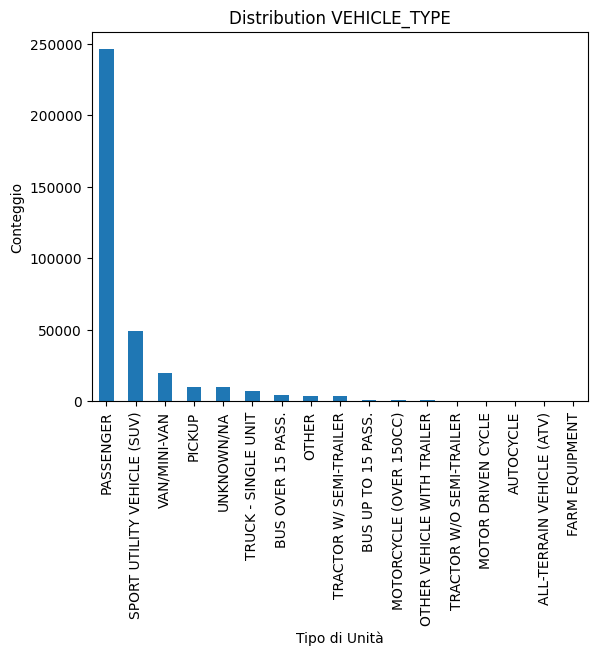

In [40]:
df_noNaN['VEHICLE_TYPE'].value_counts().plot(kind='bar')
plt.xlabel('Tipo di Unità')
plt.ylabel('Conteggio')
plt.title('Distribution VEHICLE_TYPE')
plt.show()


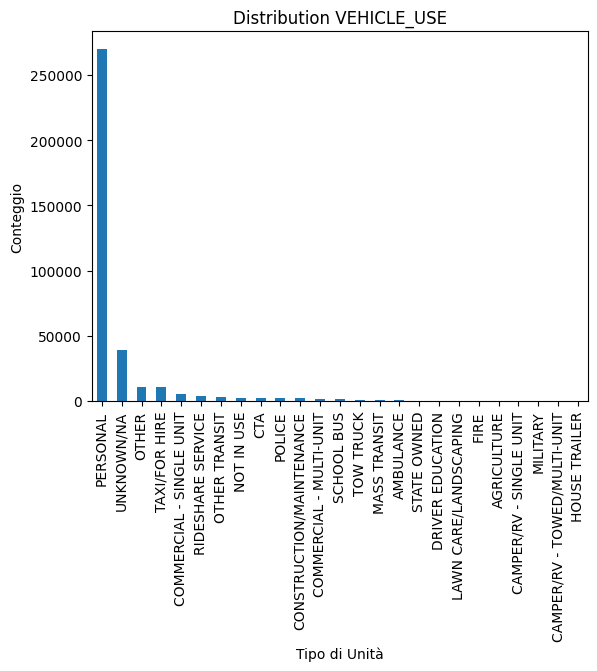

In [41]:
df_noNaN['VEHICLE_USE'].value_counts().plot(kind='bar')
plt.xlabel('Tipo di Unità')
plt.ylabel('Conteggio')
plt.title('Distribution VEHICLE_USE')
plt.show() 

La maggior parte dei veicoli sono personali, gli altri non li conosciamo e poi altre tipologie diventano man mano meno importanti.

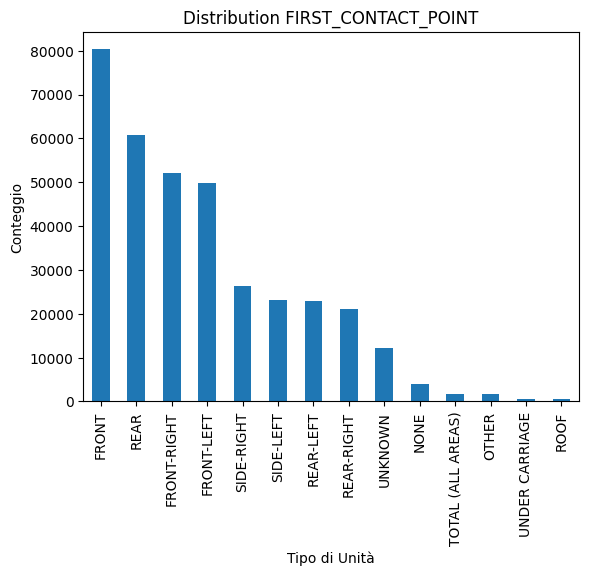

In [42]:
df_noNaN['FIRST_CONTACT_POINT'].value_counts().plot(kind='bar')
plt.xlabel('Tipo di Unità')
plt.ylabel('Conteggio')
plt.title('Distribution FIRST_CONTACT_POINT')
plt.show()  

# DUPLICATI

In [43]:
# Numero di righe duplicate
duplicati = df_noNaN.duplicated().sum()
print('Numero di righe duplicate:', duplicati)


Numero di righe duplicate: 0


Ci dice 0 ma non mi fido, quindi vediamoli per ogni colonna

In [44]:
duplicati = df_noNaN[df_noNaN.duplicated(subset='CRASH_UNIT_ID', keep=False)]
print(duplicati)

Empty DataFrame
Columns: [CRASH_UNIT_ID, RD_NO, CRASH_DATE, UNIT_NO, UNIT_TYPE, VEHICLE_ID, MAKE, MODEL, LIC_PLATE_STATE, VEHICLE_YEAR, VEHICLE_DEFECT, VEHICLE_TYPE, VEHICLE_USE, TRAVEL_DIRECTION, MANEUVER, OCCUPANT_CNT, FIRST_CONTACT_POINT]
Index: []


In [45]:
duplicati = df_noNaN[df_noNaN.duplicated(subset='RD_NO', keep=False)]

Qui ha senso avere dei duplicati perchè se un incidente ha coinvolto più persone, ci saranno più report uguali per veicoli diversi. Stessa cosa per CRASH_DATE.
Ovviamente avremo dei duplicati nel numero di unità coinvolte perchè diversi incidenti hanno una sola perosna coinvolta, altri 2 ecc..
Idem per la tipologia di DRIVER.

In [46]:
duplicati = df_noNaN[df_noNaN.duplicated(subset='VEHICLE_ID', keep=False)]
print(duplicati)

Empty DataFrame
Columns: [CRASH_UNIT_ID, RD_NO, CRASH_DATE, UNIT_NO, UNIT_TYPE, VEHICLE_ID, MAKE, MODEL, LIC_PLATE_STATE, VEHICLE_YEAR, VEHICLE_DEFECT, VEHICLE_TYPE, VEHICLE_USE, TRAVEL_DIRECTION, MANEUVER, OCCUPANT_CNT, FIRST_CONTACT_POINT]
Index: []


Non abbimao duplicati per VEHICLE_ID

AVREMO OVVIAMENTE DEI DUPLICATI PER MAKE, MODEL, PLATE, VEHICLE_YEAR, VEHICLE_YEAR, VEHICLE_TYPE, VEHICLE_USE,TRAVEL_DIRECTION, MANEUVER, OCCUPANT_CNT, FIRST_CONTACT_POINT

# RELAZIONI TRA LE VARIABILI

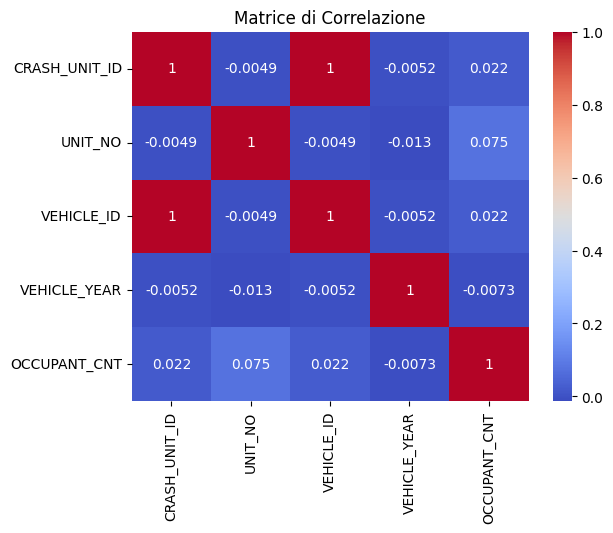

In [47]:

# Select only numeric columns
numeric_df = df_noNaN.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Visualize the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice di Correlazione')
plt.show()

Come possiamo notare VEHICLE_ID  e CRASH_UNI_ID, hanno 1 di correlazione 

In [48]:
# Conversione in datetime
df_noNaN['CRASH_DATE'] = pd.to_datetime(df_noNaN['CRASH_DATE'])

C:\Users\marti\AppData\Local\Temp\ipykernel_20596\3618765505.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_noNaN['CRASH_DATE'] = pd.to_datetime(df_noNaN['CRASH_DATE'])


In [49]:
# Estraggo anno, mese e giorno
df_noNaN['Anno'] = df_noNaN['CRASH_DATE'].dt.year
df_noNaN['Mese'] = df_noNaN['CRASH_DATE'].dt.month
df_noNaN['Giorno'] = df_noNaN['CRASH_DATE'].dt.day

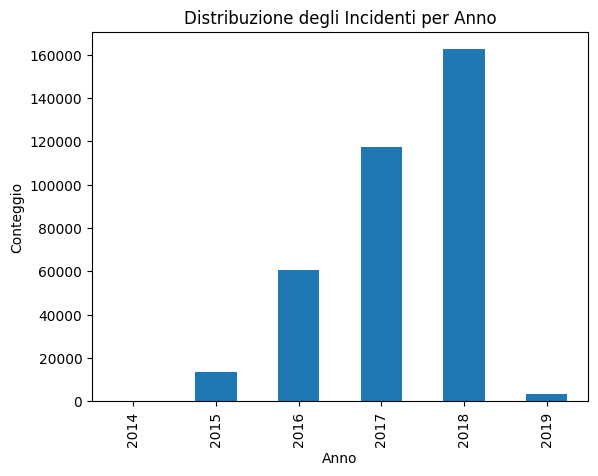

In [50]:
# Conteggio delle occorrenze per anno
df_noNaN['Anno'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Anno')
plt.ylabel('Conteggio')
plt.title('Distribuzione degli Incidenti per Anno')
plt.show()


La maggior parte degli incidenti sono stati fatti nel 2018

# Gestione Outlier

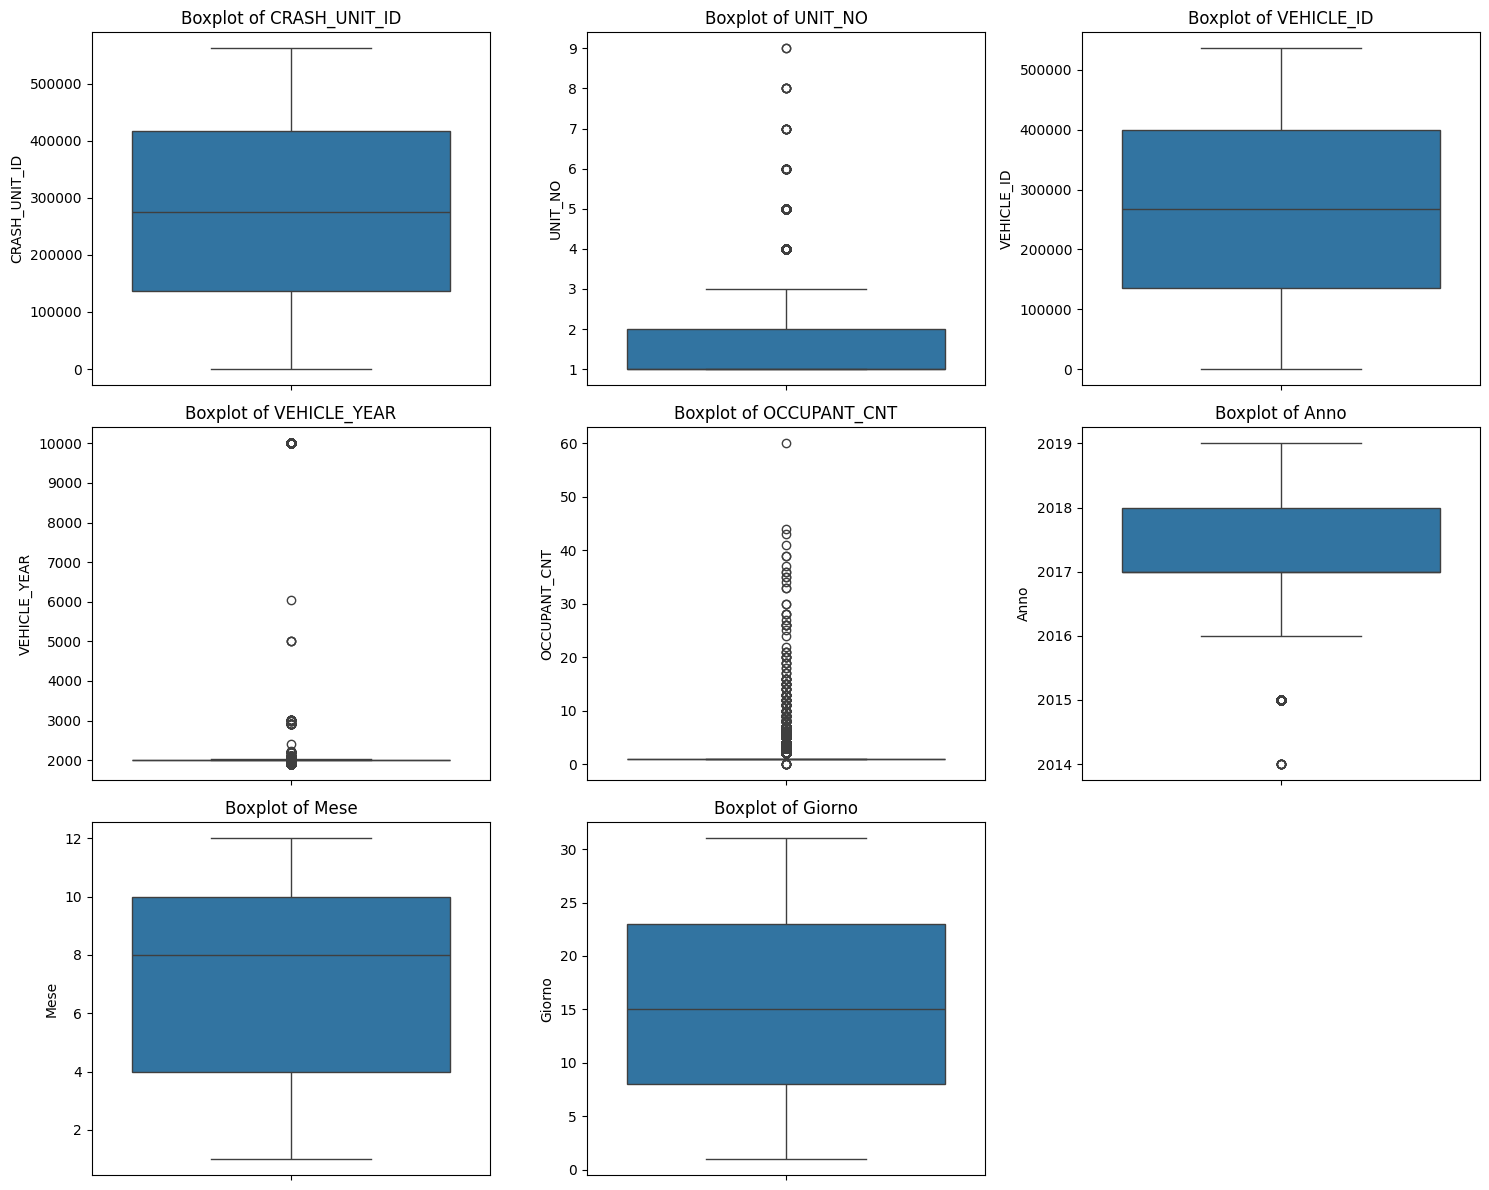

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numeric_cols by selecting numeric columns from df_noNaN
numeric_cols = df_noNaN.select_dtypes(include='number').columns.tolist()

# Set up the layout of the subplots
num_cols = len(numeric_cols)
num_rows = (num_cols // 3) + 1  # 3 columns per row

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))

for i, col in enumerate(numeric_cols):
    row = i // 3
    col_idx = i % 3
    sns.boxplot(y=df_noNaN[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot of {col}')

# Remove unused axes
for j in range(i + 1, num_rows * 3):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


Possiamo pensare di fare delle analisi con solo le unità inferiore  a 4? 
Bho non so quanto senso avrebbe ma sarebbe un modo per diminuire la quantità di dati che abbiamo

# Analisi Geografica

In [52]:
# pip install plotly

In [53]:
# Dizionario di mappatura personalizzato
code_to_country = {
    'IL': 'Israel',          # Israele
    'IN': 'India',           # India
    'WI': 'Unknown',         # Sigla non standard
    'MI': 'Unknown',         # Sigla non standard
    'XX': 'Unknown',         # Sigla per 'Non specificato' o 'Sconosciuto'
    'OH': 'Unknown',         # Sigla non standard
    'TX': 'Unknown',         # Sigla non standard
    'FL': 'Unknown',         # Sigla non standard
    'AZ': 'Azerbaijan',      # Azerbaigian
    'IA': 'Unknown',         # Sigla non standard
    'MO': 'Morocco',         # Marocco (codice ISO 'MA'), ma 'MO' potrebbe essere Macao ('MO')
    'MN': 'Mongolia',        # Mongolia
    'TN': 'Tunisia',         # Tunisia
    'CA': 'Canada',          # Canada
    'GA': 'Gabon',           # Gabon
    'OK': 'Unknown',         # Sigla non standard
    'NY': 'Unknown',         # Sigla non standard
    'PA': 'Panama',          # Panama
    'KY': 'Unknown',         # Potrebbe essere 'Cayman Islands' ('KY')
    'NC': 'New Caledonia',   # Nuova Caledonia
    'VA': 'Vatican City',    # Città del Vaticano
    'NJ': 'Unknown',         # Sigla non standard
    'MS': 'Unknown',         # Potrebbe essere 'Montserrat' o 'Mauritius' ('MU')
    'CO': 'Colombia'         # Colombia
}


In [54]:
import pandas as pd

# Crea il DataFrame dai dati forniti
data = {
    'LIC_PLATE_STATE': ['IL', 'IN', 'WI', 'MI', 'XX', 'OH', 'TX', 'FL', 'AZ', 'IA', 'MO', 'MN', 'TN', 'CA', 'GA', 'OK', 'NY', 'PA', 'KY', 'NC', 'VA', 'NJ', 'MS', 'CO'],
    'count': [336201, 6446, 2132, 1643, 959, 888, 835, 809, 743, 689, 566, 524, 463, 456, 375, 335, 261, 247, 236, 197, 185, 163, 158, 149]
}

df_counts = pd.DataFrame(data)

# Mappa le sigle ai nomi dei paesi
df_counts['country'] = df_counts['LIC_PLATE_STATE'].map(code_to_country)

# Visualizza il DataFrame aggiornato
print(df_counts)


   LIC_PLATE_STATE   count        country
0               IL  336201         Israel
1               IN    6446          India
2               WI    2132        Unknown
3               MI    1643        Unknown
4               XX     959        Unknown
5               OH     888        Unknown
6               TX     835        Unknown
7               FL     809        Unknown
8               AZ     743     Azerbaijan
9               IA     689        Unknown
10              MO     566        Morocco
11              MN     524       Mongolia
12              TN     463        Tunisia
13              CA     456         Canada
14              GA     375          Gabon
15              OK     335        Unknown
16              NY     261        Unknown
17              PA     247         Panama
18              KY     236        Unknown
19              NC     197  New Caledonia
20              VA     185   Vatican City
21              NJ     163        Unknown
22              MS     158        

In [57]:
# Filtra i dati per escludere i paesi 'Unknown'
df_map = df_counts[df_counts['country'] != 'Unknown']

# Crea la mappa coropletica
fig = px.choropleth(
    df_map,
    locations='country',
    locationmode='country names',
    color='count',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Distribuzione delle Targhe per Paese',
    labels={'count': 'Numero di Veicoli'}
)

# Aggiorna il layout per visualizzare meglio la mappa
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    coloraxis_colorbar=dict(title='Numero di Veicoli')
)

# Mostra la mappa
fig.show()
